# **Day 8: Advanced Model Topics**
---

### **Description**
In this lab, you will gain experience with feature scaling through standardization and normalization. You'll also gain experience with different feature encoding techniques. You'll get to see firsthand how K-Folds Cross Validation aids in estimating the skill of ML models.

<br>

### **Structure**
**Part 1**: [Investigating Scaling](#p1)

**Part 2**: [Investigating Feature Encoding](#p2)

**Part 3**: [K-Folds Cross Validation](#p3)

**Part 4**: [[OPTIONAL] Homework Practice](#p4)





<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how to implement standardization and normalization for feature scaling.

* Recognize how to implement various feature encoding techniques.

* Recognize how to implement K-Folds Cross Validation.

<br>

### **Resources**
* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1lDn3fan6t3cSR3X5xiaot-CYPsLxN3-RNZG-SDH73As/edit?usp=sharing)

* [pandas Commands](https://docs.google.com/document/d/15J3A2fPBjvVEegewEpXQ7Z97hf4oBMADXa1KcIx4pB0/edit?usp=sharing)


* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1hzJS5z2yOnMwa7rgNR4GNhyIIvIxtYoYEG46kYnxpSE/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: Investigating Scaling**
---

In this section, we will investigate the role that no scaling versus standardization versus normalization can have on a model's performance. Specifically, we will use a 5NN to predict the type of crop that will grow the most successfully in a given set of conditions.

**Run the cell below to load and view the data frame we will be using this section.**

In [ ]:
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/crop_recommendation/crop%20recommendation%20clean.csv'
df = pd.read_csv(url)

df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### **Problem #1.1**

Define the features and label given that we are attempting to predict the type of crop based on environmental conditions.

In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

#### **Problem #1.2**

Split the data into training and test sets such that 20% of the data is reserved for testing.

In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE

#### **Problem #1.3**

Now, create a *standardized* version of the training and testing data using sklearn's `StandardScaler()`. We will use this to compare to the original training and test sets.

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.# COMPLETE THIS CODE
X_test_std = std_scaler.# COMPLETE THIS CODE

#### **Problem #1.4**

Now, create a *normalized* version of the training and testing data using sklearn's `MinMaxScaler()`. We will use this to compare to the original training and test sets and to the standardized versions.

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.# COMPLETE THIS CODE
X_test_norm = norm_scaler.# COMPLETE THIS CODE

#### **Problem #1.5**

Before moving onto modeling, let's see if we can visually detect any differences between these types of scaling. Specifically, create three scatter plots as follows:
1. One comparing the original training data's 0th column to the *standardized* data's 0th column.
2. Another comparing the original training data's 0th column to the *normalized* data's 0th column.
3. A third one comparing the *standardized* training data's 0th column to the *normalized* data's 0th column.

##### **1. Create a scatter plot comparing the original training data's 0th column to the *standardized* data's 0th column.**

**Run the code below to accomplish this task.**

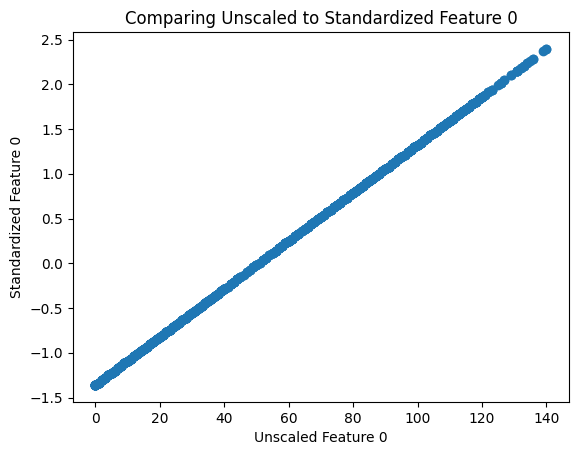

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train_std[:, 0])

plt.xlabel('Unscaled Feature 0')
plt.ylabel('Standardized Feature 0')
plt.title('Comparing Unscaled to Standardized Feature 0')

plt.show()

##### **2. Create a scatter plot comparing the original training data's 0th column to the *normalized* data's 0th column.**

In [ ]:
plt.scatter(# COMPLETE THIS CODE

plt.xlabel('Unscaled Feature 0')
plt.ylabel('Normalized Feature 0')
plt.title('Comparing Unscaled to Normalized Feature 0')

plt.show()

##### **3. Create a scatter plot comparing the *standardized* data's 0th column to the *normalized* data's 0th column.**

In [ ]:
plt.scatter(# COMPLETE THIS CODE

plt.xlabel('Standardized Feature 0')
plt.ylabel('Normalized Feature 0')
plt.title('Comparing Standardized to Normalized Feature 0')

plt.show()

#### **Problem #1.6**

**Discussion Questions**: Based on the visualizations above, does normalization or standardization seem to cause a larger change in the distribution of data or do they seem to have an equal effect? How might this affect a model's ability to make predictions?

#### **Problem #1.7**

Now it's time to model our data. Specifically, create KNN models as follows:

1. Modeling with the original, unscaled training data and testing on the test set using the accuracy and confusion matrix.

2. Modeling with the *standardized* training data and testing on the test set using the accuracy and confusion matrix.

3. Modeling with the *normalized* training data and testing on the test set using the accuracy and confusion matrix.

##### **1. Create a 5NN model with the original, unscaled training data and test it on the test set using a accuracy and confusion matrix.**

In [ ]:
model_unscaled = KNeighborsClassifier(n_neighbors = 5)

model_unscaled.fit(X_train, y_train)


pred_unscaled = model_unscaled.predict(X_test)

print(accuracy_score(y_test, pred_unscaled))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)

plt.show()

##### **2. Create a 5NN model with the *standardized* training data and test it on the test set using a accuracy and confusion matrix.**

In [ ]:
model_std = # COMPLETE THIS CODE

model_std.fit(# COMPLETE THIS CODE

pred_std =  # COMPLETE THIS CODE

print(accuracy_score(# COMPLETE THIS CODE

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)

plt.show()

##### **3. Create a 5NN model with the *normalized* training data and test it on the test set using a accuracy and confusion matrix.**

In [ ]:
model_norm = # COMPLETE THIS CODE

# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#### **Reflection questions**
Answer the following questions:

1. Which of the three models had the highest performance?

2. Which of the three models had the lowest performance?

3. For the highest performing model, what two classes did it struggle with the most according to the f1-score.

4. Using the confusion matrix, can you explain what the model may be struggling with for these two classes?

5. What might this struggle to identify these two classes reveal about them?

<a name="p2"></a>

---
## **Part 2: Investigating Feature Encoding**
---

In this section, we will investigate the role that different forms of encoding have on a model's performance. Specifically, we will use KNN to predict a high school student's final grade according to a discrete category of 0 - 20. This dataset contains many features, as described below:

* `school`: `GP` or `MS` are two different schools in Portugal where the data was collected.

* `sex`: `F` or `M` as the students identified.

* `age`: ranging from 15 - 22.

* `address`: `U` for urban and `R` for rural.

* `famsize`: `GT3` for greater than 3 family members and `LE3` for less than or equal to 3 family members.

* `Pstatus`: `T` if parents are living together and `A` if parents are living apart.

* `Medu`: Mother's education status. 'none' for no education, 'primary' for through 4th grade, 'middleschool' for through 9th grade, 'highschool' for through 12th grade, 'higher' for anything over 12th grade.

* `Fedu`: Father's education status. Same categories as `Medu`.

* `Mjob`: Mother's job.

* `Fjob`: Father's job.

* `reason`: Reason parents chose this school, which can be close to `home`, school `reputation`, `course` preference or `other`.

* `guardian`: Student's main guardian, which can be `father`, `mother`, or `other`.

* `traveltime`: How many minutes the student has to travel to get to school.

* `studytime`: How many hours the student studies per week.

* `failures`: How many classes the student has failed in the past.

* `schoolsup`: Whether the student is receiving any extra educational support.

* `famsup`: Whether the student is receiving any family educational support.

* `paid`: Whether the student is taking any extra paid courses within a course subject.

* `activities`: Whether the student is engaged in any extra-curricular activities.

* `nursery`: Whether the student attended nursery school.

* `higher`: Whether the student has expressed interested in taking higher education after graduating high school.

* `internet`: Whether the student has internet access at home.

* `romantic`: Whether the student has said they are engaged in a romantic relationship.

* `famrel`: How the student has rated the quality of their family relationships on a scale from 1 (very bad) to 5 (excellent).

* `freetime`: How the student has rated the amount of free time after school on a scale from 1 (very low) to 5 (very high).

* `goout`: How the student has rated how often they go out with friends on a scale from 1 (very low) to 5 (very high).

* `Dalc`: How the student has rated their weekday alcohol consumption on a scale from 1 (very low) to 5 (very high).

* `Walc`: How the student has rated their weekend alcohol consumption on a scale from 1 (very low) to 5 (very high).

* `health`: How the student's health ranks on a scale from 1 (very bady) to 5 (very good).

* `absences`: The number of days the student has been absent.

* `G1`: Grade in first period.

* `G2`: Grade in second period.

* `G3`: The overall grade of the student at the end of the year.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/student_portugal/student-por.csv'
df = pd.read_csv(url)

edu_map = {0: 'none', 1: 'primary', 2: 'middleschool', 3: 'highschool', 4: 'higher'}
df['Medu'] = df['Medu'].map(edu_map)
df['Fedu'] = df['Fedu'].map(edu_map)

df['traveltime'] *= 15
df['studytime'] *= 2.5


df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,higher,higher,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,primary,primary,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,primary,primary,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,higher,middleschool,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,highschool,highschool,other,other,...,4,3,2,1,2,5,0,11,13,13


### **Problem #2.1**

Just like with scaling, we must first split our training and test data *before* encoding to ensure there is no possible way for information to be exchanged between the training and test sets.

In particular, use `G3` as the label and split the data using the conventional 80/20 train/test split.

In [ ]:
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

### **Problem #2.2**

To motivate why we need encodings, attempt training a KNN model on the raw training set below.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(# COMPLETE THIS LINE

### **Problem #2.3**


Now, let's create 4 versions of the training and test sets to compare how different approaches to dealing with categorical variables work. Specifically,

1. Create a version of `X_train` and `X_test` where the unencoded categorical variables are just dropped.

2. Create a version of `X_train` and `X_test` where the unencoded categorical variables are encoded using ordinal encoding.

3. Create a version of `X_train` and `X_test` where the unencoded categorical variables are one hot encoded.

4. Create a version of `X_train` and `X_test` where the unencoded categorical variables are dummy variable encoded.

<br>

**Run the cell below to see the subset of all categorical (`object` type) columns in this data frame.**

In [ ]:
columns_to_encode = df.select_dtypes(include = object).columns

print(columns_to_encode)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


#### **1. Create a version of `X_train` and `X_test` where the unencoded categorical variables are just dropped.**

In [ ]:
X_train_drop = X_train.drop(columns = columns_to_encode)
X_test_drop = X_test.drop(columns = columns_to_encode)

X_train_drop.head()

#### **2. Create a version of `X_train` and `X_test` where the unencoded categorical variables are encoded using ordinal encoding.**

**NOTE**: We must make copies of the original training and test sets using `.copy()` so that any modifications we make to these training and test sets do not modify the original ones.

In [ ]:
X_train_ord = X_train.copy()
X_test_ord = X_test.copy()


ord_enc = OrdinalEncoder()

X_train_ord[columns_to_encode] = ord_enc.fit_transform(# COMPLETE THIS LINE
X_test_ord[columns_to_encode] = ord_enc.transform(# COMPLETE THIS LINE

X_train_ord.head()

#### **3. Create a version of `X_train` and `X_test` where the unencoded categorical variables are one hot encoded.**

Since one hot encoding creates a new feature for every possible value of categorical features, the number of columns will grow dramatically. To account for this, we will break this process into two steps:

1. Fit the one hot encoder to the training data and determine the new features.

2. Transform (encode) the training and test sets accordingly.

In [ ]:
X_train_ohe = X_train_drop.copy()
X_test_ohe = X_test_drop.copy()


ohe_enc = OneHotEncoder(sparse_output = False)
ohe_enc.set_output(transform = 'pandas')

ohe_enc.fit(X_train[# COMPLETE THIS LINE

ohe_columns = ohe_enc.get_feature_names_out()
print(ohe_columns)

In [ ]:
X_train_ohe[ohe_columns] = ohe_enc.transform(X_train[# COMPLETE THIS LINE
X_test_ohe[# COMPLETE THIS LINE

X_train_ohe.head()

#### **4. Create a version of `X_train` and `X_test` where the unencoded categorical variables are dummy variable encoded.**

Since dummy variable encoding is very similar to one hot encoding, we will follow the same process as above:

1. Fit the one hot encoder to the training data and determine the new features.

2. Transform (encode) the training and test sets accordingly.

In [ ]:
X_train_ohe = X_train_drop.copy()
X_test_ohe = X_test_drop.copy()


ohe_enc = OneHotEncoder(sparse_output = False)
ohe_enc.set_output(transform = 'pandas')

ohe_enc.fit(X_train[# COMPLETE THIS LINE

ohe_columns = ohe_enc.get_feature_names_out()
print(ohe_columns)

In [ ]:
X_train_ohe[ohe_columns] = ohe_enc.transform(X_train[# COMPLETE THIS LINE
X_test_ohe[# COMPLETE THIS LINE

X_train_ohe.head()

### **Problem #2.4**

We now have 4 distinct datasets to train models on:
1. `X_train_drop` and `X_test_drop`
2. `X_train_ord` and `X_test_ord`
3. `X_train_ohe` and `X_test_ohe`
4. `X_train_dv` and `X_test_dv`

To understand the effect that these different approaches can have, fit a KNN model to each dataset and evaluate it using a confusion matrix.

#### **1. `X_train_drop` and `X_test_drop`**

In [ ]:
model_drop = KNeighborsClassifier(n_neighbors = 5)

model_drop.fit(# COMPLETE THIS LINE

pred_drop = model_drop.predict(# COMPLETE THIS LINE

In [ ]:
cm = confusion_matrix(y_test, pred_drop, labels=model_drop.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_drop.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **2. `X_train_ord` and `X_test_ord`**

#### **3. `X_train_ohe` and `X_test_ohe`**

#### **4. `X_train_dv` and `X_test_dv`**

### **Reflection questions**
Answer the following questions:

1. Which of the four models had the highest performance?

2. Which of the four models had the lowest performance?

3. How does the highest performing model compare to randomly guessing the grade (from 0 - 19)? **NOTE**: We can use the model's weighted avg f1-score as a comparison.

<a name="p3"></a>

---
## **Part 3: K-Folds Cross Validation**
---

In this section, we will explore how to use K-Folds to evaluate and compare models before deciding on the final model we will use. Only once we have selected our final model should we evaluate it on the test set.

In particular, we will use K-Folds Cross Validation to determine the best model for several datasets.

#### **Problem #3.1**

To start, let's train and evaluate a 5NN model on the Iris dataset as usual. This is *bad practice*, but will help motivate why we should use cross validation.

In [ ]:
iris = datasets.load_iris()

features = iris.data
label = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(X_train, y_train)

pred = knn_5.predict(X_test)

print(accuracy_score(y_test, pred))

#### **Problem #3.2**

Now, let's take the proper and more insightful approach: evaluating the model using K-Folds Cross Validation. Complete the code below to evaluate a 5NN model using 10-Folds Cross Validation.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv = # COMPLETE THIS CODE
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

#### **Visualize the scores by running the cell below.**

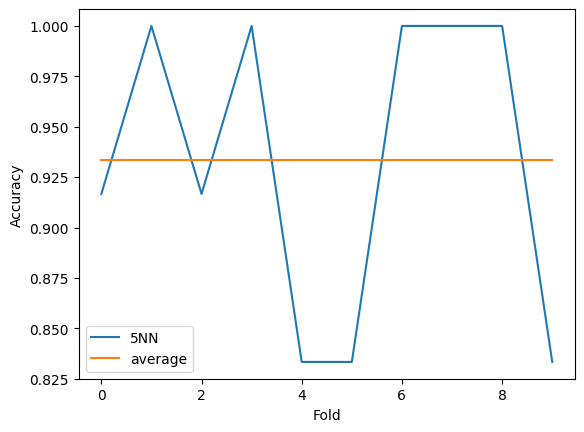

In [ ]:
plt.plot(scores_5, label = '5NN')
plt.plot([scores_5.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #3.3**

Now, use 10-Folds Cross Validation to evaluate and compare to the following models:
1. 1NN
2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)
3. 99NN


<br>

**NOTE**: There is code at the end that will visualize all of these results together.


##### **1. 1NN**

In [ ]:
knn_1 = KNeighborsClassifier(# COMPLETE THIS CODE

scores_1 = cross_val_score(# COMPLETE THIS CODE
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

##### **2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)**

In [ ]:
knn_11 = # COMPLETE THIS CODE

# COMPLETE THIS CODE

##### **3. 99NN**

In [ ]:
knn_99 = # COMPLETE THIS CODE

# COMPLETE THIS CODE

#### **Visualize the scores by running the cell below.**

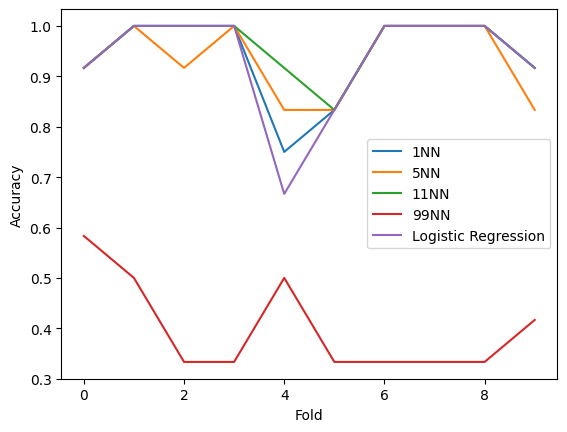

In [ ]:
plt.plot(scores_1, label = '1NN')
plt.plot(scores_5, label = '5NN')
plt.plot(scores_11, label = '11NN')
plt.plot(scores_99, label = '99NN')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #3.4**

Assuming we do not plan to try out any other models, we can safely train our final model and evaluate it on the test set. Consider the average, standard deviation, and individual scores we visualized to pick one of the models from above and:
* Train it on the entire training set.
* Evaluate it on the test set with a accuracy.


#### **Reflection questions**
Answer the following questions:

1. Which of the five models had the highest performance during cross validation?

2. Which of the five models had the lowest performance during cross validation?

3. How do the top performing model's cross validation metrics compare to the test metrics? In other words, how does this model perform in Problem #4.3 versus #4.4?

<a name = "p4"></a>

---
## **Part 4: [OPTIONAL] Homework Practice**
---



---
### **Part 4.1: Real or Fake Money?**
---

The provided dataset contains information about real and fake banknotes (paper money). Each row represents information about an image of one banknote. This data contains 5 columns:

* `range` is the range of patterns in the banknote image
* `asymmetry` is the lack of symmetry in the banknote image
* `outliers` is the amount of patterns that don't fit in with the rest in the banknote image
* `information` is the amount of total information believed to be contained in the banknote image
* `class` is 0 if the banknote is real and 1 if the banknote is fake

#### **Problem #4.1.1**

**Run the code below to load in data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRdRzlASrap1oY15IoQxXZnB5hi0RhIUCp_thFmTYOnJOw_xjR0X8sGDVyTSdPesIwqYEUQL_yelQpj/pub?gid=1496556477&single=true&output=csv"
banknote_df = pd.read_csv(url)

banknote_df.head()

,range,asymmetry,outliers,information,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### **Problem #4.1.2**

Split the data into a training and test set using `range` and `asymmetry` as the features to predict `class`.

In [ ]:
# COMPLETE THIS CODE

#### **Problem #4.1.3**

Create a standardized version of the training and test data.

In [ ]:
std_scaler = StandardScaler()
X_train_std = # COMPLETE THIS LINE
X_test_std = # COMPLETE THIS LINE

#### **Problem #4.1.4**

Create a normalized version of the training and test data.

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = # COMPLETE THIS LINE
X_test_norm = # COMPLETE THIS LINE

#### **Problem #4.1.5**

Now it's time to model our data. Let's be particularly thorough and rigorous in this process by performing 10-Folds CV on the following models:

* 1NN on unscaled data. **NOTE**: This is provided for you.
* 1NN on standardized data.
* 1NN on normalized data.

* 5NN on unscaled data.
* 5NN on standardized data.
* 5NN on normalized data.

* 33NN on unscaled data. **NOTE**: $\sqrt{\text{length of training data}} \approx 33$
* 33NN on standardized data.
* 33NN on normalized data.

* 549NN on unscaled data. **NOTE**: ${\frac{1}{2}\text{(length of training data})} \approx 549$
* 549NN on standardized data.
* 549NN on normalized data.

* Any other models you would like to try.


<br>

**NOTE**: This may seem like a *lot*, but there's very little that will need to change for each model.

In [ ]:
# 1NN on unscaled data

knn_1_unscaled = KNeighborsClassifier(n_neighbors = 1)

scores_1_unscaled = cross_val_score(knn_1_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_unscaled.mean()) + " +/- " + str(scores_1_unscaled.std()))

In [ ]:
# 1NN on standardized data

In [ ]:
# 1NN on normalized data

In [ ]:
# 5NN on unscaled data

In [ ]:
# 5NN on standardized data

In [ ]:
# 5NN on normalized data

In [ ]:
# 33NN on unscaled data

In [ ]:
# 33NN on standardized data

In [ ]:
# 33NN on normalized data

In [ ]:
# 549NN on unscaled data

In [ ]:
# 549NN on standardized data

In [ ]:
# 549NN on normalized data

#### **Visualize the scores by running the cell below.**

**NOTE**: You will need to update the variable names here if they do not match with what you named the list of cross validation scores you used in any case.

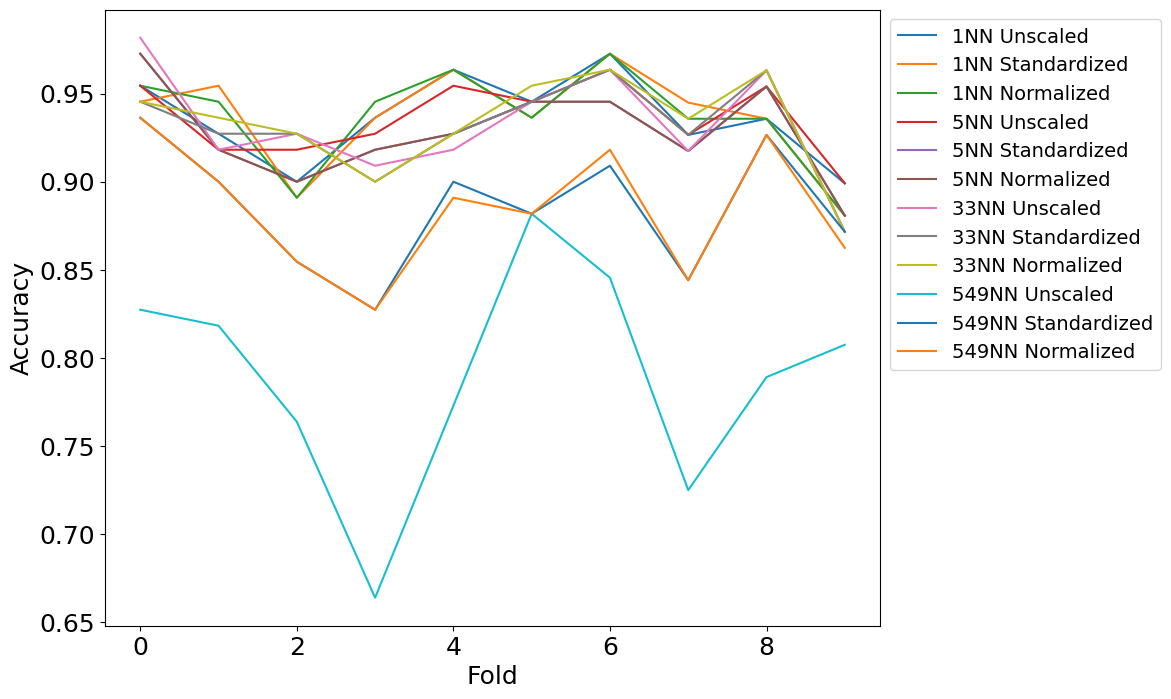

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(scores_1_unscaled, label = '1NN Unscaled')
plt.plot(scores_1_std, label = '1NN Standardized')
plt.plot(scores_1_norm, label = '1NN Normalized')

plt.plot(scores_5_unscaled, label = '5NN Unscaled')
plt.plot(scores_5_std, label = '5NN Standardized')
plt.plot(scores_5_norm, label = '5NN Normalized')

plt.plot(scores_33_unscaled, label = '33NN Unscaled')
plt.plot(scores_33_std, label = '33NN Standardized')
plt.plot(scores_33_norm, label = '33NN Normalized')

plt.plot(scores_549_unscaled, label = '549NN Unscaled')
plt.plot(scores_549_std, label = '549NN Standardized')
plt.plot(scores_549_norm, label = '549NN Normalized')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1), fontsize = 14)

plt.show()

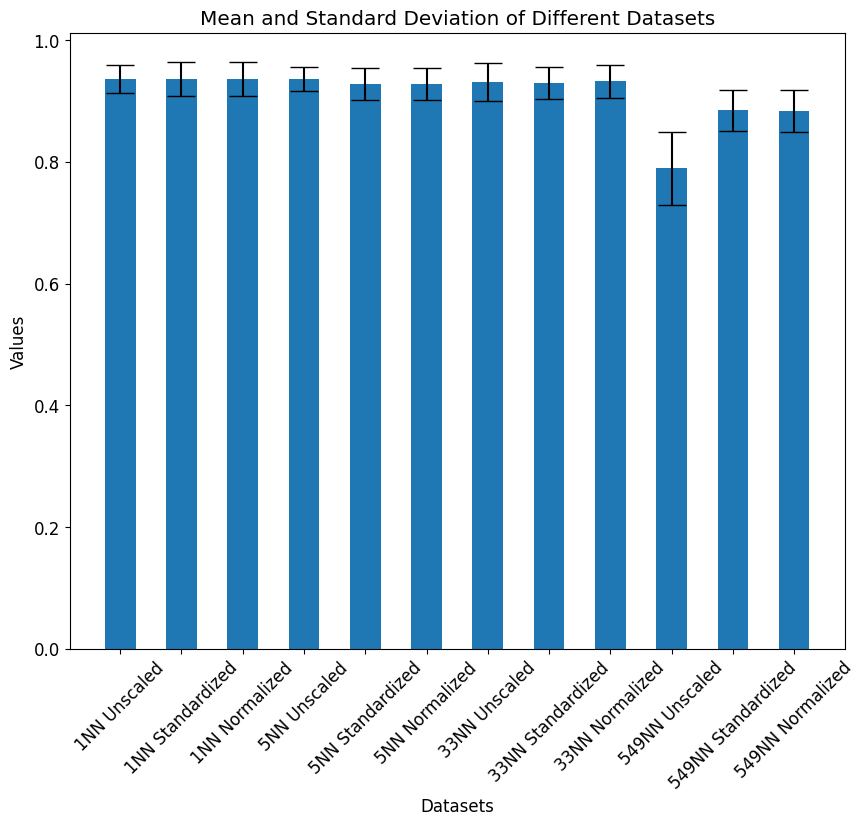

In [ ]:
# Calculate mean and standard deviation for each data set
scores = [scores_1_unscaled, scores_1_std, scores_1_norm,
          scores_5_unscaled, scores_5_std, scores_5_norm,
          scores_33_unscaled, scores_33_std, scores_33_norm,
          scores_549_unscaled, scores_549_std, scores_549_norm]

mean_values = [np.mean(score) for score in scores]
std_dev_values = [np.std(score) for score in scores]

# Labels for the bars
labels = ['1NN Unscaled', '1NN Standardized', '1NN Normalized',
          '5NN Unscaled', '5NN Standardized', '5NN Normalized',
          '33NN Unscaled', '33NN Standardized', '33NN Normalized',
          '549NN Unscaled', '549NN Standardized', '549NN Normalized']

# Bar width
bar_width = 0.5

# Plotting
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (10, 8))

# Bar plots with error bars representing standard deviations
ax.bar(labels, mean_values, bar_width, yerr=std_dev_values, capsize=10)

# Adding labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of Different Datasets')

# Show the plot
plt.xticks(rotation = 45)
plt.show()

#### **Problem #4.1.6**

Choose the best model from above by considering all the information from the outputs and the graphs, train it on the whole training set, and evaluate it on the test set using the accuracy and confusion matrix.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE



---
### **Part 4.2: Classifying Stars Revisited**
---

In this section, you can revisit the stars dataset from last week to properly model this dataset with your newfound hyperparameter tuning and validation skillset.

#### **Problem #4.2.1**

**Run the code below to load in data.**

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,Red,0
1,3042,0.000500,0.1542,Red,0
2,2600,0.000300,0.1020,Red,0
3,2800,0.000200,0.1600,Red,0
4,1939,0.000138,0.1030,Red,0


#### **Problem #4.2.2**

Split the data into a training and test set using `temperature` and `size` as the features to predict `class`.

In [ ]:
# COMPLETE THIS CODE

#### **Problem #4.2.3**

Create a standardized version of the training and test data.

In [ ]:
std_scaler = StandardScaler()
X_train_std = # COMPLETE THIS LINE
X_test_std = # COMPLETE THIS LINE

#### **Problem #4.2.4**

Create a normalized version of the training and test data.

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = # COMPLETE THIS LINE
X_test_norm = # COMPLETE THIS LINE

#### **Problem #4.2.5**

Now it's time to model our data. Let's be particularly thorough and rigorous in this process by performing 10-Folds CV on the following models:

* 1NN on unscaled data. **NOTE**: This is provided for you.
* 1NN on standardized data.
* 1NN on normalized data.

* 5NN on unscaled data.
* 5NN on standardized data.
* 5NN on normalized data.

* 15NN on unscaled data. **NOTE**: $\sqrt{\text{length of training data}} \approx 15$
* 15NN on standardized data.
* 15NN on normalized data.

* 107NN on unscaled data. **NOTE**: ${\frac{1}{2}\text{(length of training data})} \approx 107$
* 107NN on standardized data.
* 107NN on normalized data.

* Any other models you would like to try.


<br>

**NOTE**: This may seem like a *lot*, but there's very little that will need to change for each model.

In [ ]:
# 1NN on unscaled data

In [ ]:
# 1NN on standardized data

In [ ]:
# 1NN on normalized data

In [ ]:
# 5NN on unscaled data

In [ ]:
# 5NN on standardized data

In [ ]:
# 5NN on normalized data

In [ ]:
# 33NN on unscaled data

In [ ]:
# 33NN on standardized data

In [ ]:
# 33NN on normalized data

In [ ]:
# 549NN on unscaled data

In [ ]:
# 549NN on standardized data

In [ ]:
# 549NN on normalized data

#### **Visualize the scores by running the cell below.**

**NOTE**: You will need to update the variable names here if they do not match with what you named the list of cross validation scores you used in any case.

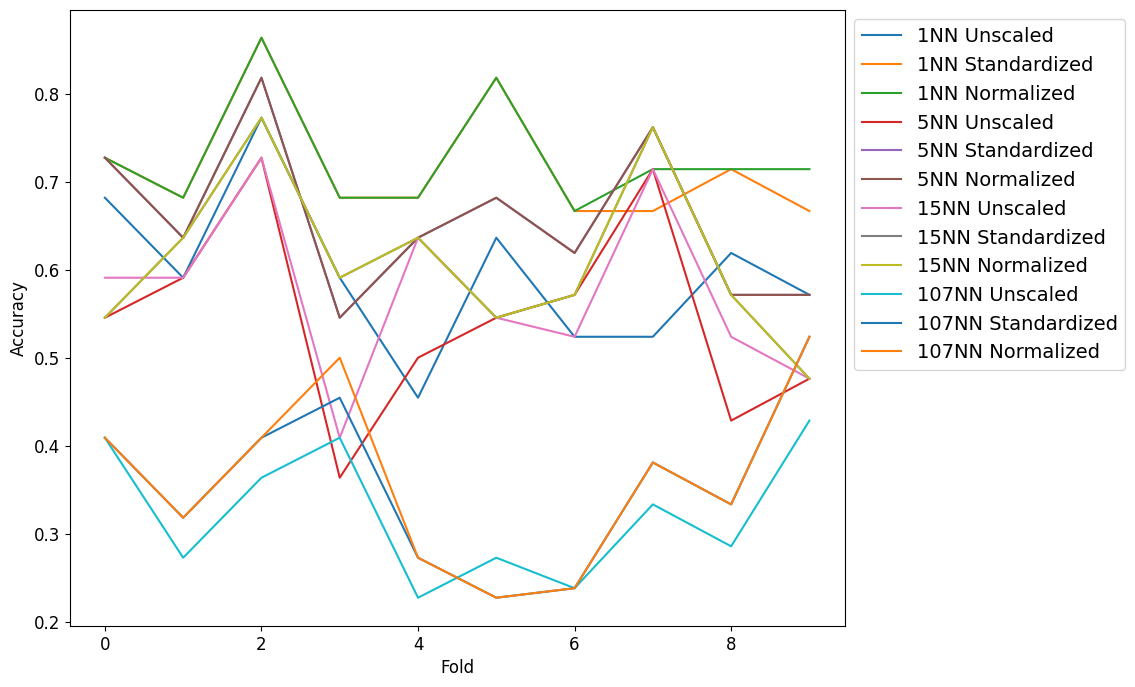

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(scores_1_unscaled, label = '1NN Unscaled')
plt.plot(scores_1_std, label = '1NN Standardized')
plt.plot(scores_1_norm, label = '1NN Normalized')

plt.plot(scores_5_unscaled, label = '5NN Unscaled')
plt.plot(scores_5_std, label = '5NN Standardized')
plt.plot(scores_5_norm, label = '5NN Normalized')

plt.plot(scores_15_unscaled, label = '15NN Unscaled')
plt.plot(scores_15_std, label = '15NN Standardized')
plt.plot(scores_15_norm, label = '15NN Normalized')

plt.plot(scores_107_unscaled, label = '107NN Unscaled')
plt.plot(scores_107_std, label = '107NN Standardized')
plt.plot(scores_107_norm, label = '107NN Normalized')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1), fontsize = 14)

plt.show()

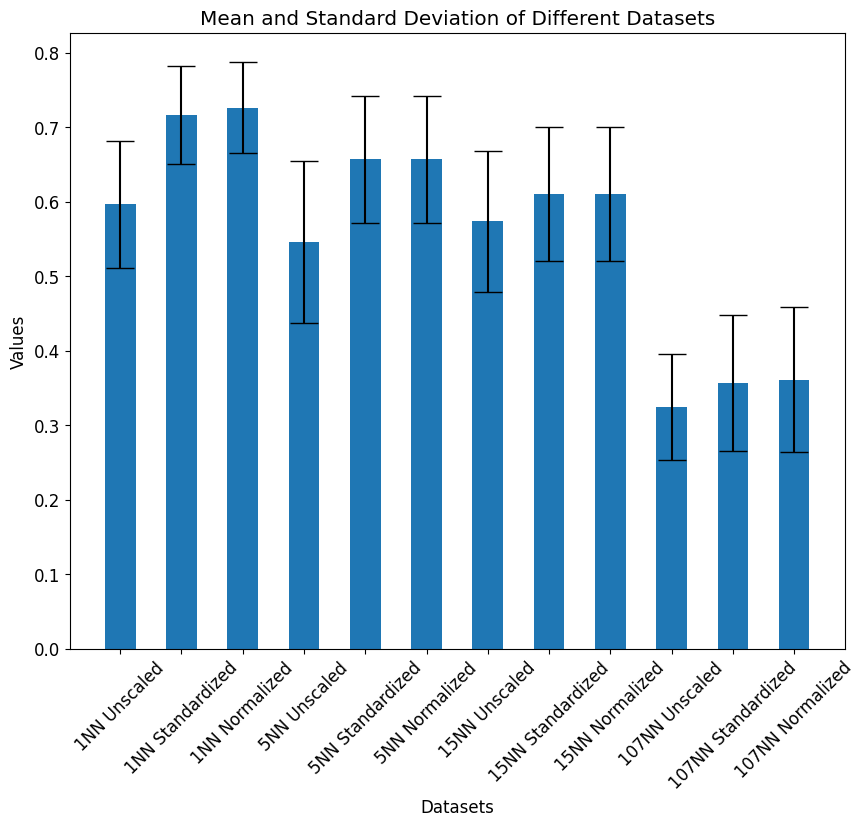

In [ ]:
# Calculate mean and standard deviation for each data set
scores = [scores_1_unscaled, scores_1_std, scores_1_norm,
          scores_5_unscaled, scores_5_std, scores_5_norm,
          scores_15_unscaled, scores_15_std, scores_15_norm,
          scores_107_unscaled, scores_107_std, scores_107_norm]

mean_values = [np.mean(score) for score in scores]
std_dev_values = [np.std(score) for score in scores]

# Labels for the bars
labels = ['1NN Unscaled', '1NN Standardized', '1NN Normalized',
          '5NN Unscaled', '5NN Standardized', '5NN Normalized',
          '15NN Unscaled', '15NN Standardized', '15NN Normalized',
          '107NN Unscaled', '107NN Standardized', '107NN Normalized']

# Bar width
bar_width = 0.5

# Plotting
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (10, 8))

# Bar plots with error bars representing standard deviations
ax.bar(labels, mean_values, bar_width, yerr=std_dev_values, capsize=10)

# Adding labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of Different Datasets')

# Show the plot
plt.xticks(rotation = 45)
plt.show()

#### **Problem #4.2.6**

Choose the best model from above by considering all the information from the outputs and the graphs, train it on the whole training set, and evaluate it on the test set using the accuracy and confusion matrix.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

---

# End of Notebook

© 2024 The Coding School, All rights reserved